#                                                    TIME SERIES ANALYSIS

  Time series analysis is defined as 'methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.

IMPORTING REQUIRED LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import datetime
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import itertools
import warnings
warnings.filterwarnings("ignore")




LOADING THE DATASET

In [4]:
time_data = pd.read_csv('kappa number.csv')

In [5]:
time_data.head()

,Observation,Y-Kappa,ChipRate,BF-CMratio,BlowFlow,ChipLevel4,T-upperExt-2,T-lowerExt-2,UCZAA,WhiteFlow-4,...,SteamFlow-4,Lower-HeatT-3,Upper-HeatT-3,ChipMass-4,WeakLiquorF,BlackFlow-2,WeakWashF,SteamHeatF-3,T-Top-Chips-4,SulphidityL-4
0,31-00:00,23.10,16.520,121.717,1177.607,169.805,358.282,329.545,1.443,599.253,...,67.122,329.432,303.099,175.964,1127.197,1319.039,257.325,54.612,252.077,NaN
1,31-01:00,27.60,16.810,79.022,1328.360,341.327,351.050,329.067,1.549,537.201,...,60.012,330.823,304.879,163.202,665.975,1297.317,241.182,46.603,251.406,29.11
2,31-02:00,23.19,16.709,79.562,1329.407,239.161,350.022,329.260,1.600,549.611,...,61.304,329.140,303.383,164.013,677.534,1327.072,237.272,51.795,251.335,NaN
3,31-03:00,23.60,16.478,81.011,1334.877,213.527,350.938,331.142,1.604,623.362,...,68.496,328.875,302.254,181.487,767.853,1324.461,239.478,54.846,250.312,29.02
4,31-04:00,22.90,15.618,93.244,1334.168,243.131,351.640,332.709,NaN,638.672,...,70.022,328.352,300.954,183.929,888.448,1343.424,215.372,54.186,249.916,29.01




From the Dataset, we observed that the column OBSERVATION represented in DateTime format. Using the OBSERVATION we need to forecast values of our predictor variable Y-KAPPA

In [6]:
time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Observation      301 non-null    object 
 1   Y-Kappa          301 non-null    float64
 2   ChipRate         297 non-null    float64
 3   BF-CMratio       287 non-null    float64
 4   BlowFlow         288 non-null    float64
 5   ChipLevel4       300 non-null    float64
 6   T-upperExt-2     300 non-null    float64
 7   T-lowerExt-2     300 non-null    float64
 8   UCZAA            277 non-null    float64
 9   WhiteFlow-4      300 non-null    float64
 10  AAWhiteSt-4      160 non-null    float64
 11  AA-Wood-4        300 non-null    float64
 12  ChipMoisture-4   300 non-null    float64
 13  SteamFlow-4      300 non-null    float64
 14  Lower-HeatT-3    300 non-null    float64
 15  Upper-HeatT-3    300 non-null    float64
 16  ChipMass-4       300 non-null    float64
 17  WeakLiquorF     

   Converting OBSERVATION column from string to dateformat and arranging the data in required format to draw better conclusions.

    OBSERVATION column has the data of 13 days including values of predictor for 24 hours each day. The Time Series data 
    starts from 31st of previous month and has data of 12 days in next month.
    
    #ask doubt

In [7]:
date=time_data.Observation
list_of_dates=list()
for i in range(len(date)):
    dt_object1 = datetime.strptime(date[i],'%d-%H:%M')
    
    if i >=24:
        #After 24 rows we are appending next month 
        dt_object1 = dt_object1+ relativedelta(months=1)
        
    #storing all the data in a list
    list_of_dates.append(dt_object1)

Creating Dataframe for parsed dates with column name Observation

In [8]:
df=pd.DataFrame({"Observation":list_of_dates})
df

,Observation
0,1900-01-31 00:00:00
1,1900-01-31 01:00:00
2,1900-01-31 02:00:00
3,1900-01-31 03:00:00
4,1900-01-31 04:00:00
...,...
296,1900-02-12 08:00:00
297,1900-02-12 09:00:00
298,1900-02-12 10:00:00
299,1900-02-12 11:00:00


## Creating Time Series data

The given data has been collected over a period of time. Therefore, the attribute (Y-KAPPA), which is being observed at regular time intervals. This type of data is known as Time Series Data.

Creating DataFrame with Y-Kappa as predictor and setting Observation as index

In [9]:
arima_data=pd.DataFrame(time_data['Y-Kappa'])
arima_data.index=df.Observation
arima_data

,Y-Kappa
Observation,
1900-01-31 00:00:00,23.10
1900-01-31 01:00:00,27.60
1900-01-31 02:00:00,23.19
1900-01-31 03:00:00,23.60
1900-01-31 04:00:00,22.90
...,...
1900-02-12 08:00:00,20.40
1900-02-12 09:00:00,20.90
1900-02-12 10:00:00,24.98


## Steps involved in forecasting the data

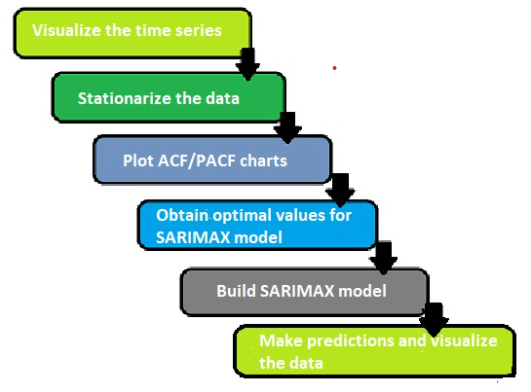

## Visualizing the Time Series data

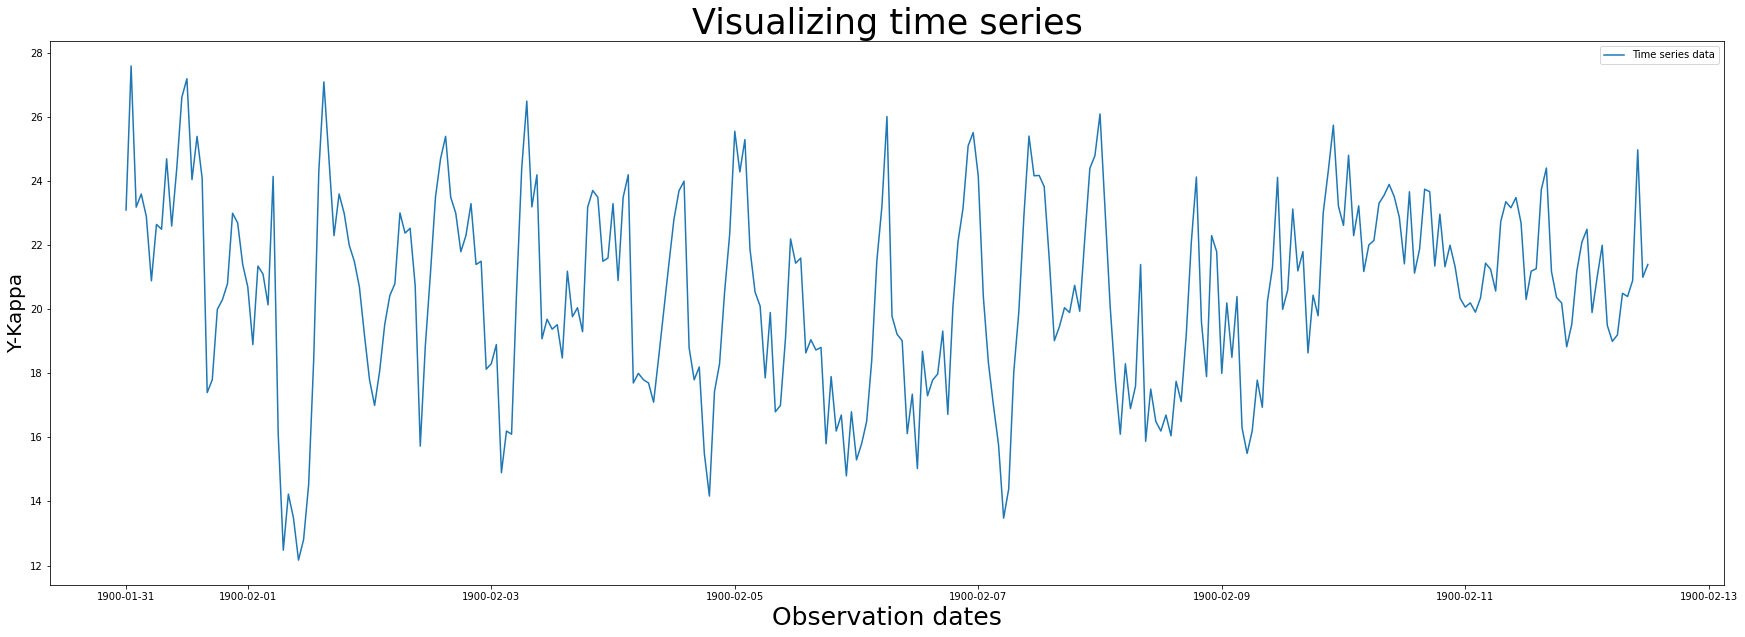

In [10]:
#plotting time series data using matplotlib library

plt.figure(figsize=(30,10))
plt.plot(arima_data,label='Time series data')
plt.xlabel('Observation dates', fontsize=25)
plt.ylabel('Y-Kappa',fontsize=20)
#plt.xticks(arima_data.resample('D'))
plt.title('Visualizing time series',fontsize=35)
plt.legend()
plt.show()

## Visualizing patterns in the data

The Time Series data may be a combination of one or more of these factors. Understanding these factors will help us to identify patterns in the data. The patterns in Time Series data are

    Trend: shows a long term increase or decrease in data
    
    Seasonal: when the data is affected by seasonal factors
    
    Cyclic: data shows fluctuations across any period of time
    
    Random: If the above 3 components are missing in a data

These components are extracted by using the statsmodels package in python. Seasonal Decompose help us to find the patterns in data.

#### Visualizing the Trend component of time series data

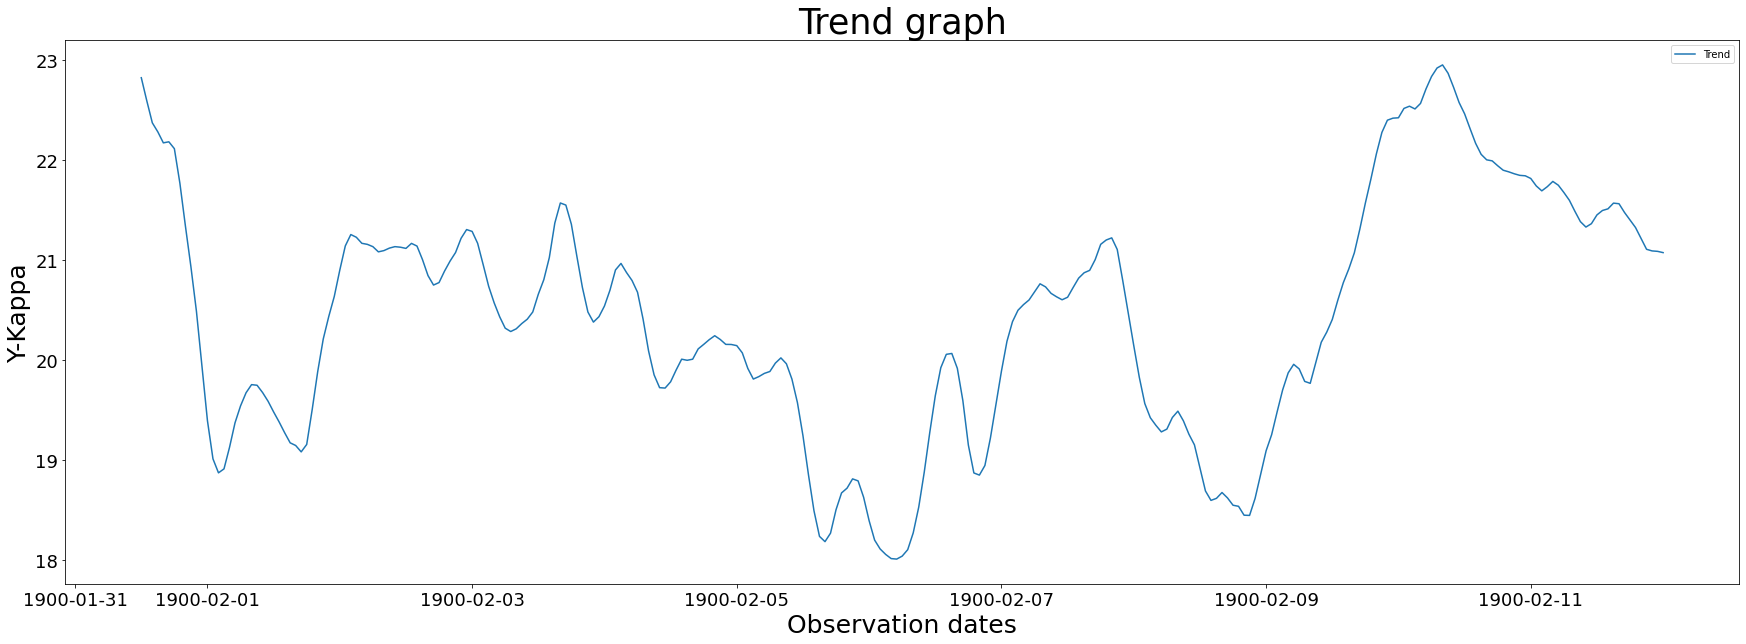

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(30,10))
plt.plot(seasonal_decompose(arima_data,period=24).trend,label='Trend') #Observing Trend over 24 hours 
plt.xlabel('Observation dates',fontsize=25)
plt.ylabel('Y-Kappa',fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Trend graph',fontsize=35)
plt.legend()
plt.show()

From the graph we conclude that there is no observed trend in the graph.

#### Visualizing the Seasonal component of time series data

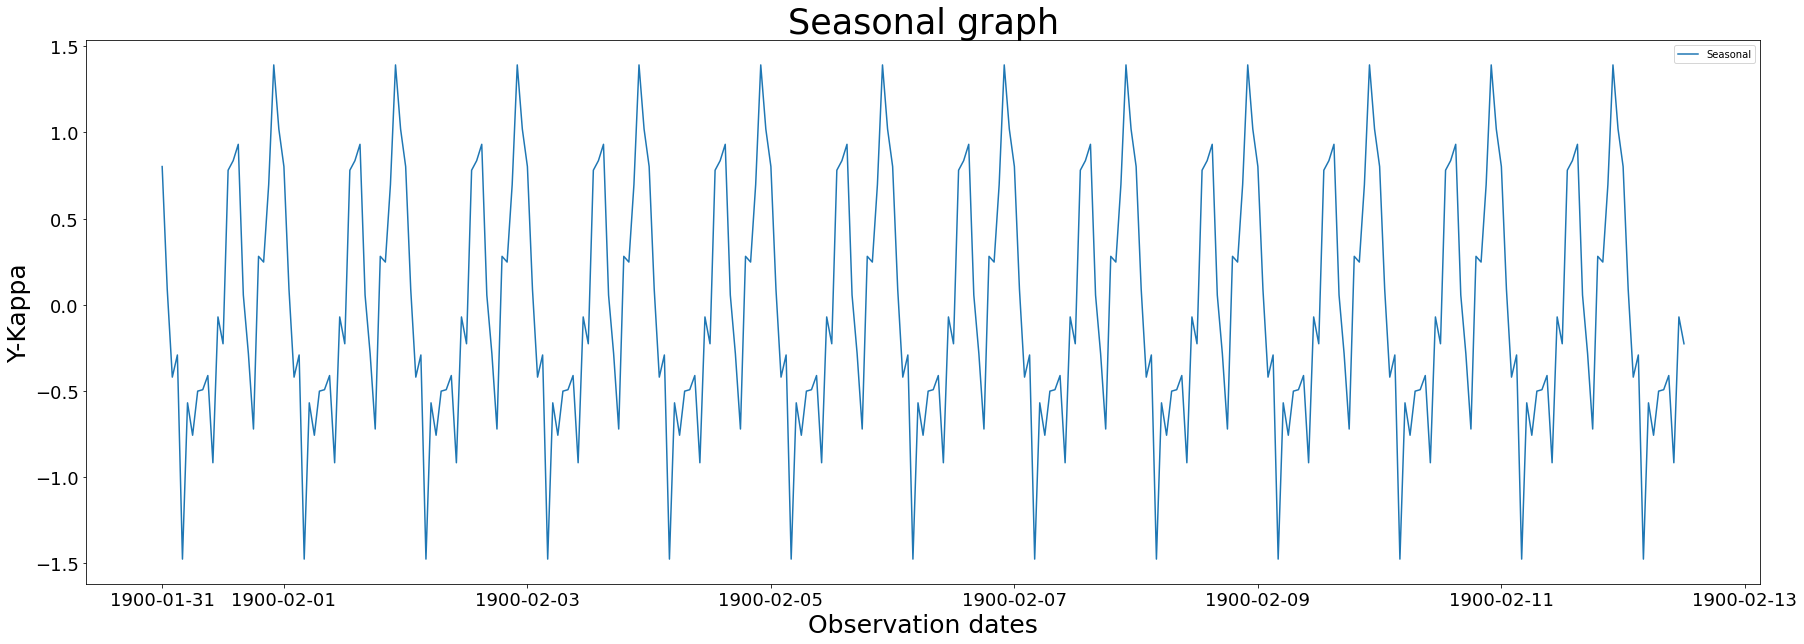

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(30,10))
plt.plot(seasonal_decompose(arima_data,period=24).seasonal,label='Seasonal')
#Seasonality is observed in the plot over the period of 24 hours
plt.xlabel('Observation dates',fontsize=25)
plt.ylabel('Y-Kappa',fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Seasonal graph',fontsize=35)
plt.legend()
plt.show() 

From this graph, we can conclude there is seasonality for every 24 hours.

#### Visualizing the residual component of time series data

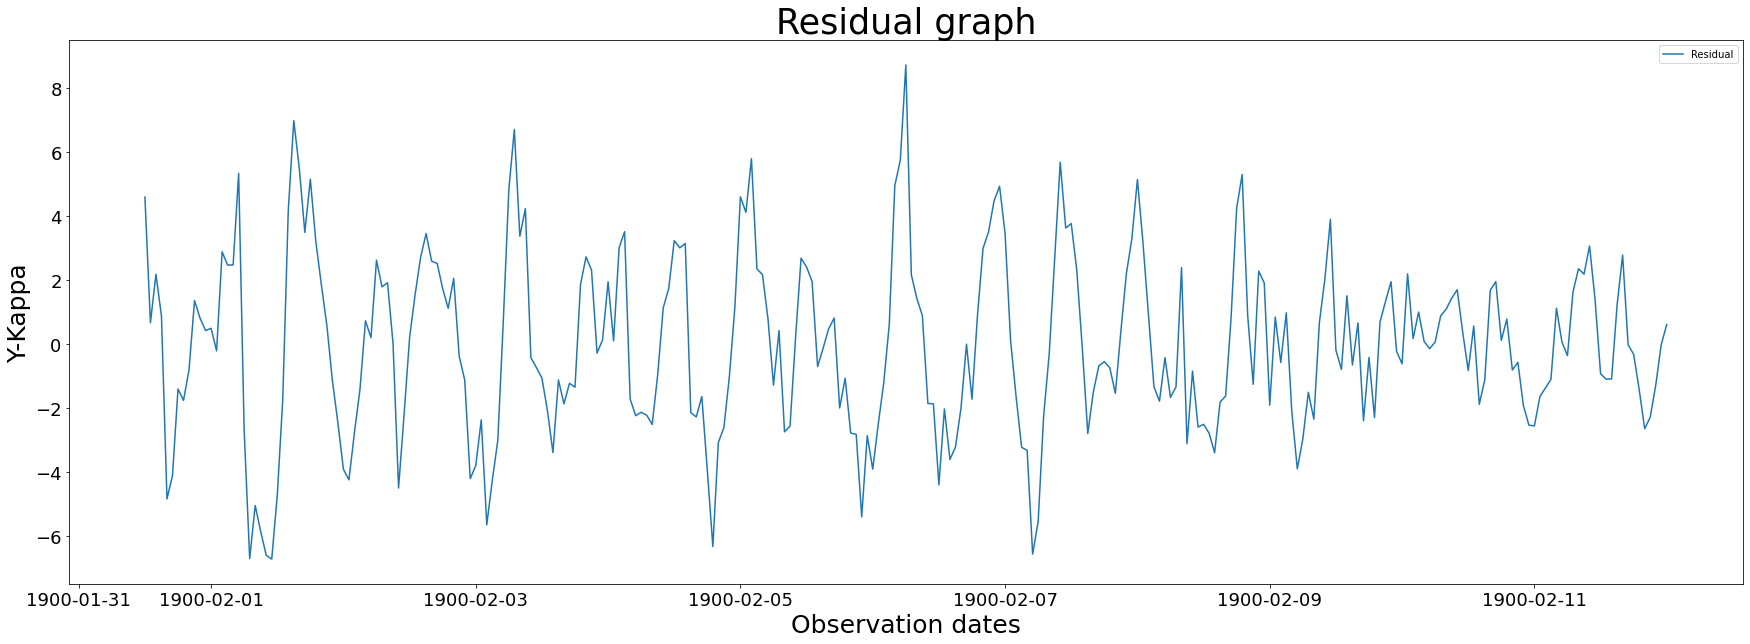

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
 
plt.figure(figsize=(30,10))
plt.plot(seasonal_decompose(arima_data,period=24).resid,label='Residual') 
plt.xlabel('Observation dates',fontsize=25)
plt.ylabel('Y-Kappa',fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Residual graph',fontsize=35)
plt.legend()
plt.show()

The graph showing residual component of the Time Series data

#### Visualizing the observed component of time series data

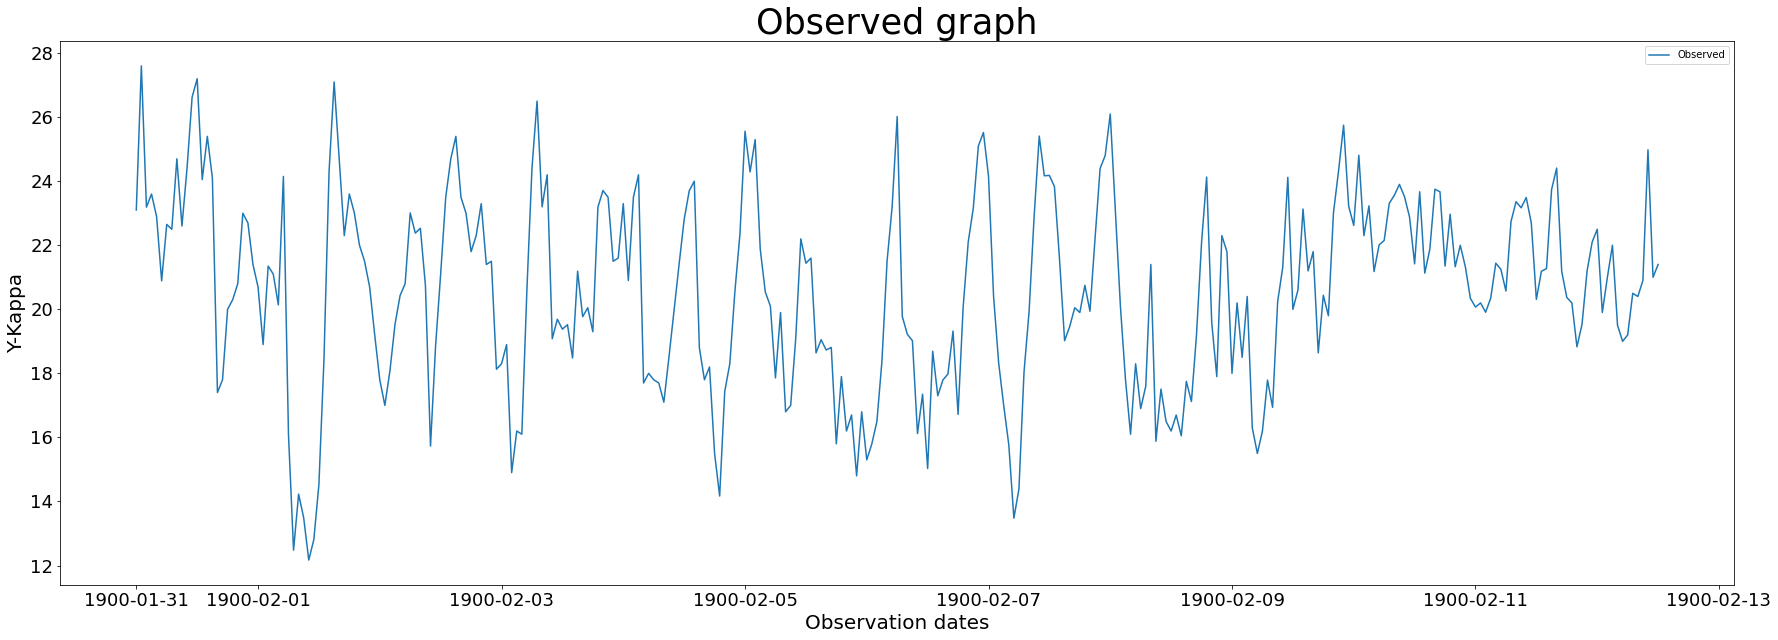

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(30,10))
plt.plot(seasonal_decompose(arima_data,period=24).observed,label='Observed') 
plt.xlabel('Observation dates',fontsize=20)
plt.ylabel('Y-Kappa',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Observed graph',fontsize=35)
plt.legend()
plt.show()

This graph represents the original Time Series data.

## Testing the stationarity of the time series data

We can check the stationarity of the series by using the Dickey-Fuller test. It uses hypothesis testing for checking the stationarity of a series as mentioned below. 

Null Hypothesis : series is non-stationary

Alternate Hypothesis : series is stationary

If the null hypothesis is rejected, then the series is assumed to be stationary, where the p-value will be less than 0.05.

If we fail to reject null hypothesis, then the series is assumed to be non-stationary. We need to difference the variable and repeat the dickey-fuller test to see if the differenced variable is stationary.

In [15]:
from statsmodels.tsa.stattools import adfuller
def dffunc(arima_data):
    dftest = adfuller(arima_data, autolag='AIC')
    dfoutput = pd.Series([dftest[0],dftest[1], dftest[4]["5%"],dftest[5]], index=['Test Statistic','p-value', 'Critical Value at 5%','AIC'])
    print(dfoutput)
    return(dftest[1])

# p-value > 0.05: Fail to reject the null hypothesis (H0)-> it is not stationary
# p-value <= 0.05: Reject the null hypothesis (H0) -> it is stationary
p_value=dffunc(arima_data)
if p_value<=0.05:
    print("\np-value <= 0.05 : It is stationary")
else:
    print("\np-value > 0.05 : It is not stationary")

Test Statistic         -7.847721e+00
p-value                 5.709667e-12
Critical Value at 5%   -2.871321e+00
AIC                     1.180963e+03
dtype: float64

p-value <= 0.05 : It is stationary


Here the p-value is less than 0.05 and we reject the Null Hypothesis and conclude the data is stationary. Hence, there is no need to do differencing. So the value of d=0

## Plotting ACF and PACF Plots

### Autocorrelation plot

ACF is an auto-correlation function which gives us value q of any series based on lagged values. We can plot ACF plot by using statsmodels package in python

<Figure size 2160x720 with 0 Axes>

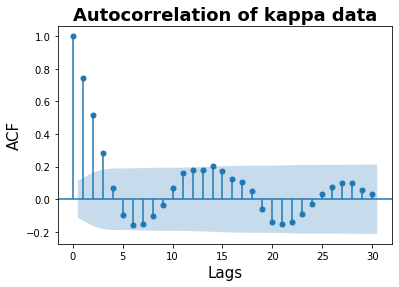

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(30,10))
plot_acf(arima_data, lags=30)
plt.xlabel('Lags', fontsize=15)
plt.ylabel('ACF', fontsize=15)
plt.title('Autocorrelation of kappa data', fontsize=18, weight='bold')
plt.show()
# By visualizing the graph, we can find the q value based on lags.
# We name the spikes with index starting from 0. We will select the first spike as q value based on either of the two conditions.
# Condition 1 is the spike must be completely inside the shaded region.
# Condition 2 is that the blue dot of spike must touch the shaded region and the line must be in the shaded region.
# The spike with index name 4 satisfies the one of the above condition. So, the q value is 4.

    From above graph, we can get q value is 4

### Partial Autocorrelation plot

The PACF plot is a plot of the partial correlation coefficients between the series and lags of itself.  We can plot ACF plot by using statsmodels package in python

PACF plot is used to identify the value of p.

<Figure size 2160x720 with 0 Axes>

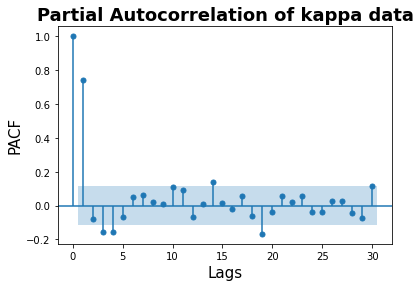

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(30,10))
plot_pacf(arima_data, lags=30)
plt.xlabel('Lags', fontsize=15)
plt.ylabel('PACF', fontsize=15)
plt.title('Partial Autocorrelation of kappa data', fontsize=18, weight='bold')
plt.show()
# By visualizing the graph, we can find the p value based on lags.
# We name the spikes with index starting from 0. We will select the first spike as p value based on either of the two conditions.
# Condition 1 is the spike must be completely inside the shaded region.
# Condition 2 is that the blue dot of spike must touch the shaded region and the line must be in the shaded region.
# The spike with index name 4 satisfies the one of the above condition. So, the p value is 2.

    From above graph, we can get p value is 2

After finding the patterns of this Time Series data. We can clearly observe the seasonality component in the data over 24 hours. As seasonality is present in data, we will implement SARIMAX model

# Time series forecasting with SARIMAX

Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.

### Finding optimal values for SARIMAX model

Finding the parameters manually can be challenging sometimes, therefore we create different models on a range of parameters and gets the best parameters based on AIC/BIC value.

Generating different combinations for p,d,q and P,D,Q using itertools package in python

In [25]:
p = d = q = range(0, 2) 
pdq = list(itertools.product(p, d, q)) # Generating different combinations for p,d,q using 0,1
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))] # Genrating differnert combinations for P,D,Q,S
# 24 repesents the seasonality factor(24 hour data)

Here, we are finding optimal values using AIC values

AIC: The Akaike Information Critera (AIC) is a widely used to measure of a statistical model. It basically quantifies 

    1) the goodness of fit, and 
    2) the simplicity/parsimony, of the model into a single statistic.

When comparing two models, the one with the lower AIC is generally “better”.

In [28]:
ans=[] 
for param in pdq:
    for param_seasonal in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(arima_data,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}24 - AIC:{}'.format(param, param_seasonal, results.aic))
            ans.append([param, param_seasonal, results.aic])
# AIC used to get a best fit value based on data
# we find optimal value from the output which has lower value of AIC
# As lower the AIC value we get best optimal value

ARIMA(0, 0, 0)x(0, 0, 0, 24)24 - AIC:2673.643203398224
ARIMA(0, 0, 0)x(0, 0, 1, 24)24 - AIC:2184.979847307299
ARIMA(0, 0, 0)x(0, 1, 0, 24)24 - AIC:1594.815377966329
ARIMA(0, 0, 0)x(0, 1, 1, 24)24 - AIC:1286.0812048110065
ARIMA(0, 0, 0)x(1, 0, 0, 24)24 - AIC:1596.1032577238807
ARIMA(0, 0, 0)x(1, 0, 1, 24)24 - AIC:1464.1632446208134
ARIMA(0, 0, 0)x(1, 1, 0, 24)24 - AIC:1364.369300512606
ARIMA(0, 0, 0)x(1, 1, 1, 24)24 - AIC:1325.684535896748
ARIMA(0, 0, 1)x(0, 0, 0, 24)24 - AIC:2300.466785204511
ARIMA(0, 0, 1)x(0, 0, 1, 24)24 - AIC:1905.2501645824384
ARIMA(0, 0, 1)x(0, 1, 0, 24)24 - AIC:1442.1938807926156
ARIMA(0, 0, 1)x(0, 1, 1, 24)24 - AIC:1158.6186852037108
ARIMA(0, 0, 1)x(1, 0, 0, 24)24 - AIC:1451.2723730293499
ARIMA(0, 0, 1)x(1, 0, 1, 24)24 - AIC:1309.1172576974093
ARIMA(0, 0, 1)x(1, 1, 0, 24)24 - AIC:1238.0826132963925
ARIMA(0, 0, 1)x(1, 1, 1, 24)24 - AIC:1188.7189690717498
ARIMA(0, 1, 0)x(0, 0, 0, 24)24 - AIC:1303.4852019439236
ARIMA(0, 1, 0)x(0, 0, 1, 24)24 - AIC:1198.798056324228

Finding the optimum p,d,q and P,D,Q values based on AIC. The one which has least AIC is considered

In [42]:
#we take parameter values based on least AIC value. 
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'AIC'])
ans_df = ans_df.sort_values(by=['AIC'],ascending=True) # sort the list based on AIC value in ascending order
pdq=ans_df.iloc[0,0] # get value for p,d,q
pdqs=ans_df.iloc[0,1] # get value for P,D,Q,S
print("p,d,q : ",pdq,"\nP,D,Q,S : ",pdqs,"\nAIC : ",ans_df.iloc[0,2])

p,d,q :  (1, 0, 1) 
P,D,Q,S :  (0, 1, 1, 24) 
AIC :  1095.1124298597745


### Implementing SARIMAX model

#### Splitting the train and test data

Here, we split the data into train and test data in the ratio 66:34

In [32]:
X = arima_data
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

#### Building model

We forecast each value for Y-Kappa based on the previous values and comparing with Test data


In [34]:
original = [x for x in train.values]
predictions = list() # Empty list

# We will find predicted data for every test data
for t in range(len(test)):
    # It has seasonal data so, we use SARIMAX model
    model = sm.tsa.statespace.SARIMAX(original,order=pdq,seasonal_order=pdqs,enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit()
    output = model_fit.forecast() #predicts the value
    yvar = output[0]
    predictions.append(yvar) # Adding predicted value to the list
    obs = test.iloc[t]
    original.append(obs) # Adding actual value to original list
    print('predicted=%f, expected=%f' % (yvar, obs))


predicted=19.211544, expected=16.900000
predicted=17.280871, expected=17.600000
predicted=18.107451, expected=21.400000
predicted=21.703578, expected=15.880000
predicted=15.608262, expected=17.510000
predicted=19.566510, expected=16.500000
predicted=17.559437, expected=16.200000
predicted=18.410965, expected=16.700000
predicted=17.747075, expected=16.050000
predicted=16.932731, expected=17.750000
predicted=17.543955, expected=17.120000
predicted=18.000253, expected=19.200000
predicted=18.460086, expected=22.090000
predicted=22.764949, expected=24.130000
predicted=23.534139, expected=19.600000
predicted=20.072663, expected=17.900000
predicted=19.008718, expected=22.300000
predicted=22.597286, expected=21.800000
predicted=21.864096, expected=18.000000
predicted=17.012806, expected=20.200000
predicted=20.045528, expected=18.500000
predicted=18.397439, expected=20.400000
predicted=19.454972, expected=16.300000
predicted=17.573424, expected=15.500000
predicted=16.551020, expected=16.200000


Creating a DataFrame for the prediction values of Test Data

In [36]:
prediction=pd.DataFrame(predictions,index=test.index,columns=['Y-Kappa'])
prediction

,Y-Kappa
Observation,
1900-02-08 06:00:00,19.211544
1900-02-08 07:00:00,17.280871
1900-02-08 08:00:00,18.107451
1900-02-08 09:00:00,21.703578
1900-02-08 10:00:00,15.608262
...,...
1900-02-12 08:00:00,20.687849
1900-02-12 09:00:00,20.311295
1900-02-12 10:00:00,20.584396


#### Visualizing Actual data vs Predicted data for Test data

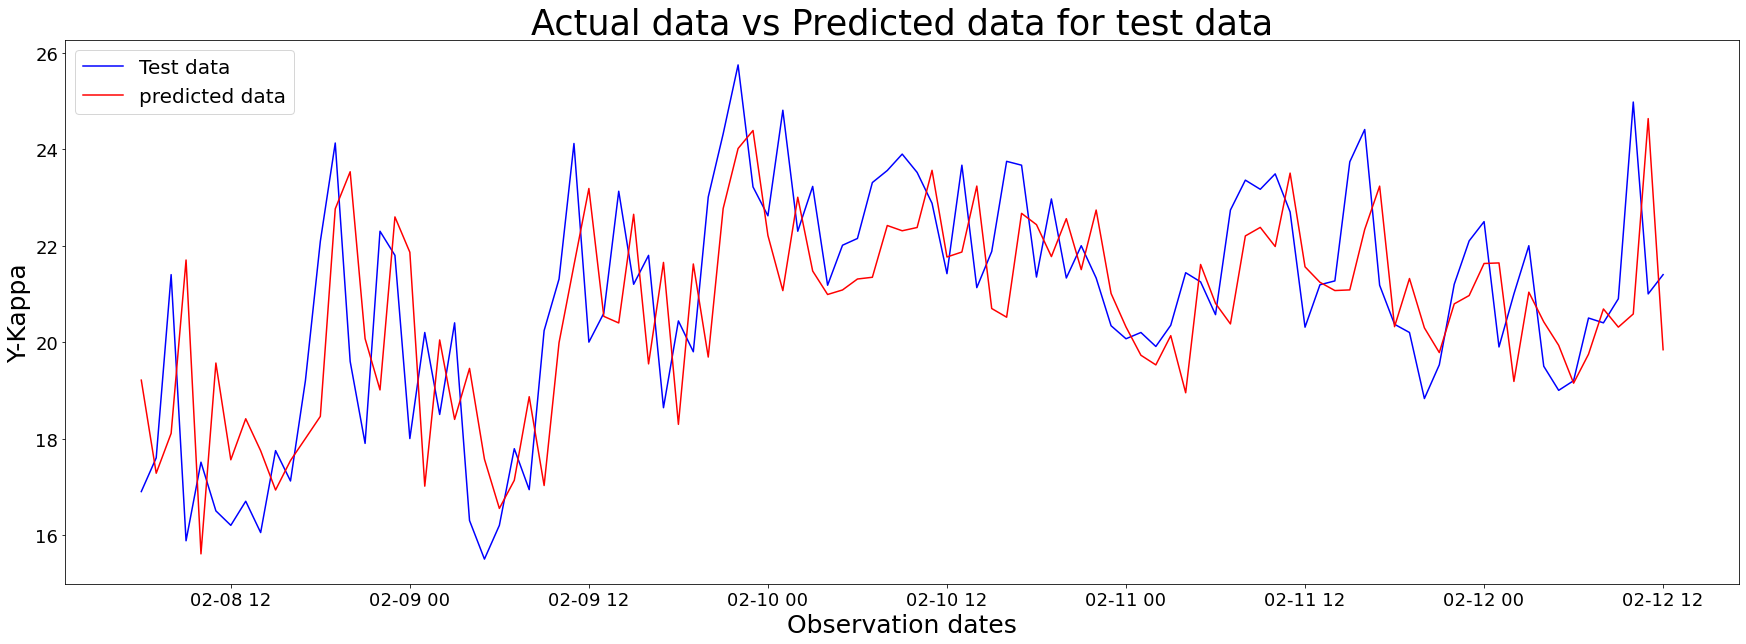

In [37]:
plt.figure(figsize=(30,10))
plt.plot(test,color='blue',label='Test data')
plt.plot(prediction, color='red',label='predicted data')
plt.xlabel('Observation dates',fontsize=25)
plt.ylabel('Y-Kappa',fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Actual data vs Predicted data for test data',fontsize=35)
plt.legend(prop={'size': 20})
plt.show()

From the above graph, we can conclude that there is no large variation between Actual data vs Predicted data

#### Visualizing the Prediction of Time Series data

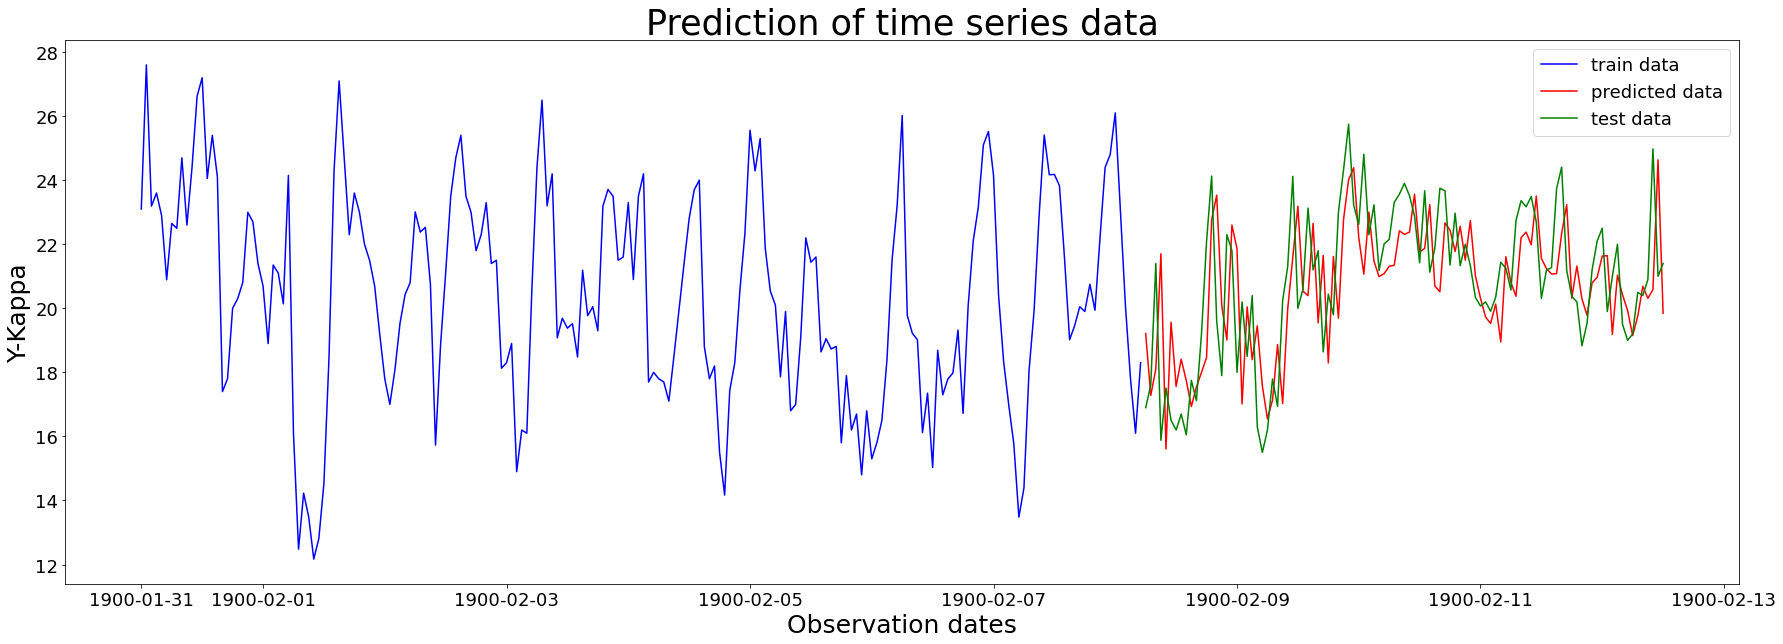

In [41]:
plt.figure(figsize=(30,10))
plt.plot(train,color='blue',label='train data')
plt.plot(prediction, color='red',label='predicted data')
plt.plot(test,color='green',label='test data')
plt.xlabel('Observation dates',fontsize=25)
plt.ylabel('Y-Kappa',fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Prediction of time series data',fontsize=35)
plt.legend(prop={'size': 18})
plt.show()

#### Finding Root Mean Square Error

We use RMSE to find the performance of the current model.

In [39]:
rmse = np.sqrt(mean_squared_error(test,prediction))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.944


As we can observe from the figure that the model has forecasted test data with an good RMSE of 1.944. 